# Movie recommendations.

## Introduction:
For this project, we will use the "small" dataset from [GroupLens](https://grouplens.org/datasets/movielens/latest/). This dataset includes four main files:

- **movies.csv**: Contains information about each movie, including its ID, title, and genres.  
- **ratings.csv**: Records user ratings, with fields for user ID, movie ID, rating, and timestamp.  
- **tags.csv**: Aggregates user-generated keywords associated with movies.  
- **links.csv**: Provides mappings between MovieLens IDs and external databases such as IMDb and TMDB.

Since good recommendations play an important role in client satisfaction we will make of Our objective to develop a recommendation system that can automatically suggest the top 5 movies to a given user. These recommendations will be based on the user's past ratings and those of similar users.



 ## Methodology
 #### **Exploratory data Analysis**
 - dataset overview & cleaning
 - dataset description
 - data/ business understanding
 #### **Major questions**
 this part will sharpen our understanding of the data and the business task.
 Major questions will be answered.
 they will help us grasp the data.

#### **Modelisation**
- data preparation for modelisation
- building Matrix
- collaborative filtering
- training/ optimisation of SVD model

#### **Contact information**
- name
- email
- phone number
- LinkedIn


##  Exploratory data Analysis




#### **Dataset overview & cleaning**

In [ ]:
# importing library
import pandas as pd
import numpy as np

# Vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Modelisation & Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Collaborative Filtering & Recommendation
from surprise import Dataset, Reader, SVD, KNNBasic, accuracy
from surprise.model_selection import cross_validate, train_test_split as surprise_train_test_split

# Divers
import warnings
warnings.filterwarnings('ignore')



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

we will load the necessary files

In [ ]:
movies_df = pd.read_csv('movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies_df.shape

(9742, 3)

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [ ]:
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [ ]:
# let's check for duplicates
duplicates = movies_df.duplicated()
print("duplicates :", duplicates.sum())

Nombre de doublons : 0


In [ ]:
ratings_df = pd.read_csv('ratings.csv')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings_df.shape

(100836, 4)

In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
ratings_df['userId'].nunique()

610

#### **Comment**

The **movies.csv** file contains **9,742 movies** with three main columns: **movieId**, **title**, and **genres**.

- No missing values;
The **ratings.csv** file contains **100,836 ratings** made by **610 users** across various movies.

- Ratings range from **0.5 to 5**, typical of the **MovieLens 100k** dataset.

These two files are clean and complete , which simplifies the preparation phase.


#### **Dataset Description**
Some description have been provided in the introduction of this project. For more description of the data you may wanna read this:

The dataset is composed of four main files:

movies.csv: contains information about the movies (ID, title, genres). ratings.csv: contains user ratings (userId, movieId, rating, timestamp). tags.csv: gathers keywords associated with movies by users. links.csv: provides mappings between MovieLens IDs, IMDb, and TMDB.

For this project, we will focus on movies.csv and ratings.csv, as they form the foundation of collaborative filtering:

ratings.csv allows us to build the user–movie matrix based on the ratings given.




#### **business understanding**
Video streaming platforms face a major challenge: delivering relevant content to each user from an immense catalog. Without personalized recommendations, users may feel lost and leave the platform, leading to lower retention.

Our goal is to build a recommendation system capable of automatically suggesting the top 5 movies to a user, based on their past ratings and those of similar users.

This collaborative filtering model will analyze shared behaviors among users to predict future preferences. By integrating such a solution, a streaming company can enhance the user experience, increase engagement, and reduce churn.

The key idea behind collaborative filtering is that similar users share similar interests, and users tend to like items that others with similar tastes also enjoy.

 #### Merging the two datasets on the common key movieId.

In [ ]:
# Merging the datasets on 'movieId'
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# preview
merged_df.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [ ]:
# shape
merged_df.shape

(100836, 6)

## Major Questions

#### What does the distribution of ratings reveal?

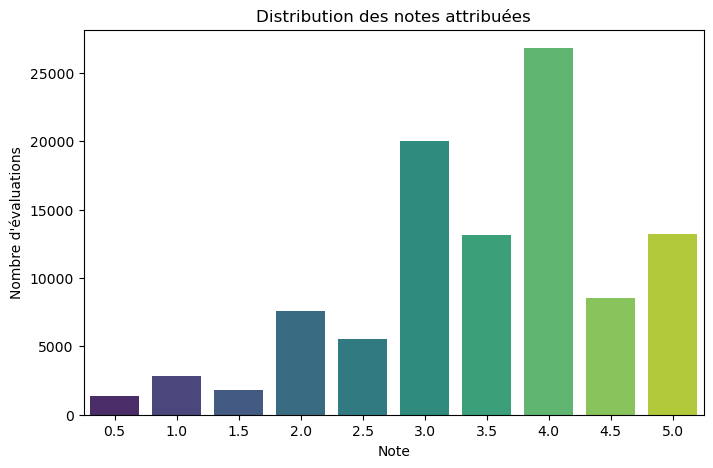

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title("rating distribution ")
plt.xlabel("Note")
plt.ylabel("Number of evaluation")
plt.show()

#### Answer
most ratings fall between 3 and 5, suggesting a generally positive trend.

#### What does the distribution of ratings per user reveal about user activity levels?

In [2]:
ratings_per_user = ratings_df.groupby('userId')['rating'].count()
plt.figure(figsize=(10,5))
sns.histplot(ratings_per_user, bins=50, kde=True)
plt.title("Distribution of the evaluation number per user")
plt.xlabel("Number of evaluation ")
plt.ylabel("Number of user")
plt.show()

NameError: name 'ratings_df' is not defined

# Answer
 some users are highly active while others contribute very few ratings, highlighting the imbalance.

#### What does the number of ratings per movie reveal about the dataset’s structure?

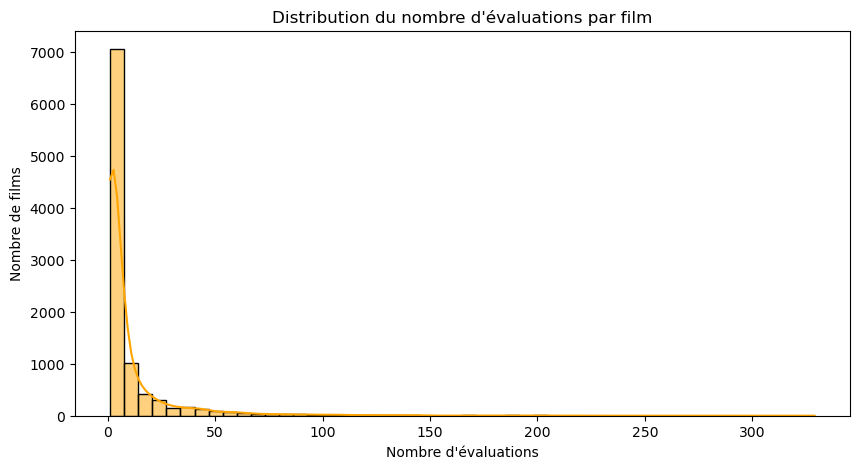

In [ ]:
ratings_per_movie = ratings_df.groupby('movieId')['rating'].count()
plt.figure(figsize=(10,5))
sns.histplot(ratings_per_movie, bins=50, kde=True, color='orange')
plt.title("Distribution of the number of evaluation)
plt.xlabel("Number of evaluation")
plt.ylabel("Number of movie")
plt.show()

#### Answer
some movies have far more ratings thatn others.

#### What does the average rating per movie suggest about overall film reception?

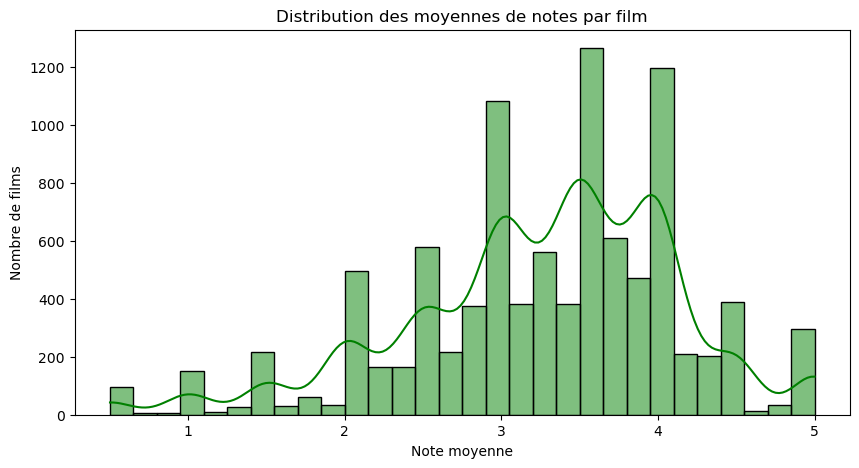

In [ ]:
mean_ratings = ratings_df.groupby('movieId')['rating'].mean()
plt.figure(figsize=(10,5))
sns.histplot(mean_ratings, bins=30, kde=True, color='green')
plt.title("mean distribution per movie")
plt.xlabel("mean rate")
plt.ylabel("Number of movie")
plt.show()

#### Answer
It reflects the observation that most movies are rated between 3 and 4.5, with few receiving very low scores.

#### How are average ratings affected by the number of votes?

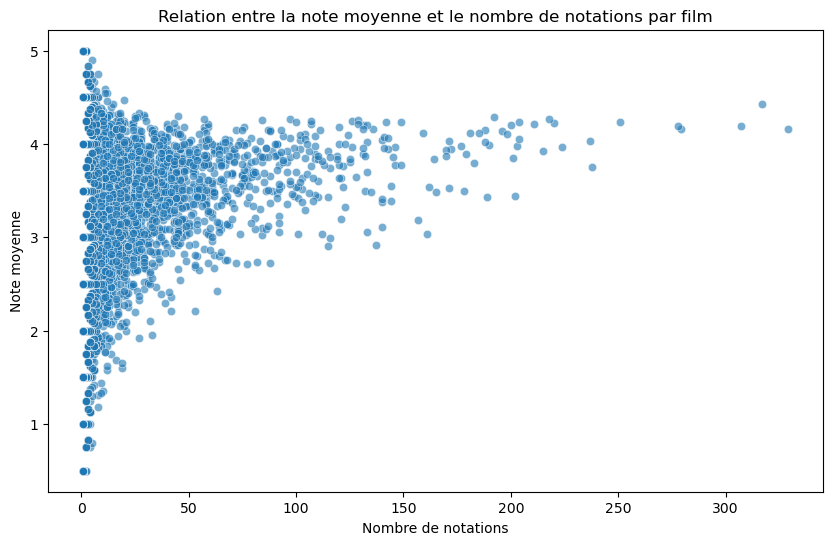

In [ ]:
# Calcul du nombre de notes et de la moyenne des notes par film
ratings_summary = ratings_df.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
ratings_summary = ratings_summary.merge(movies_df[['movieId', 'title']], on='movieId')

# Nuage de points : note moyenne vs nombre de notations
plt.figure(figsize=(10,6))
sns.scatterplot(data=ratings_summary, x='count', y='mean', alpha=0.6)
plt.title("Relation between th mean and the numbe of rating per movie)
plt.xlabel("number of ratings ")
plt.ylabel("Mean rating")
plt.show()

#### Answer
Movies with only a handful of ratings often show extreme values—either very high or very low—whereas those with many ratings tend to stabilize around an average of 3.5. This highlights the importance of having enough ratings to reliably gauge a film’s actual popularity.

#### Top 10 Most Rated Movies

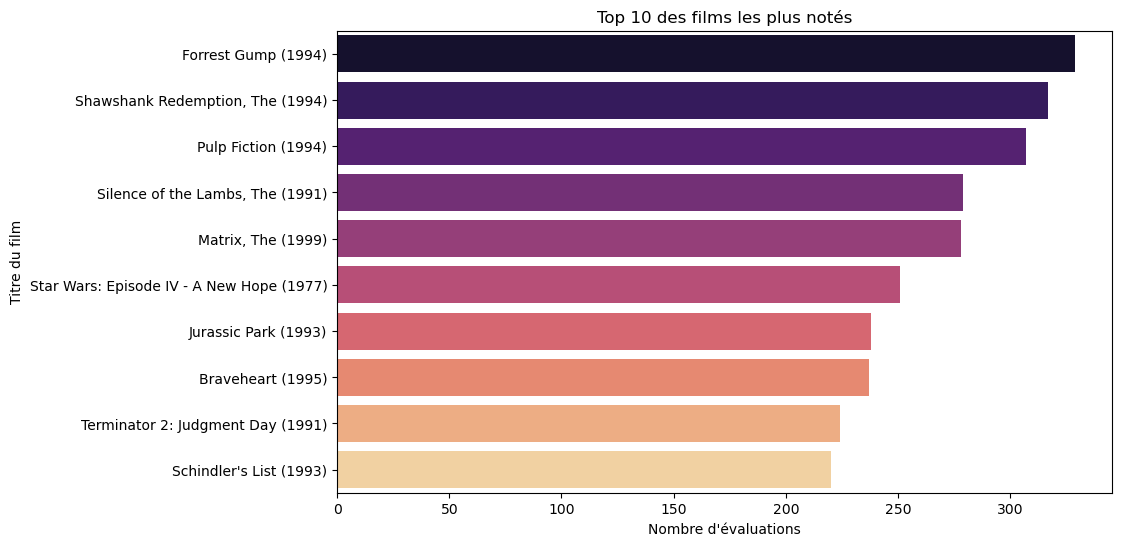

In [ ]:
top_movies = (merged_df.groupby('title')['rating']
              .count()
              .sort_values(ascending=False)
              .head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='magma')
plt.title("Top 10 des films les plus notés")
plt.xlabel("Nombre d'évaluations")
plt.ylabel("Titre du film")
plt.show()

#### What are the most common genres ?


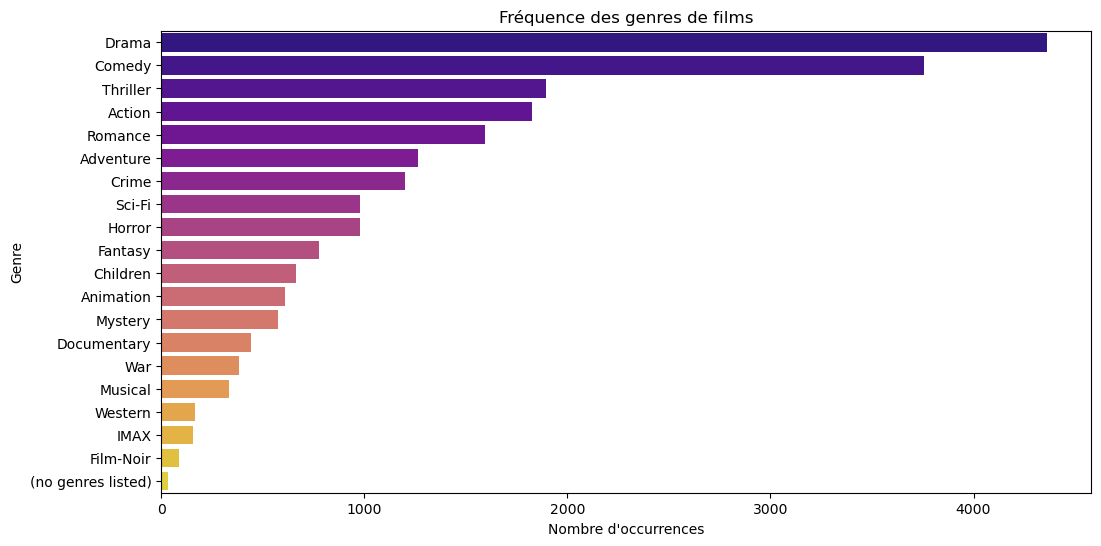

In [ ]:
from collections import Counter

all_genres = []
for g in movies_df['genres']:
    all_genres.extend(g.split('|'))

genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='plasma')
plt.title("Fréquence des genres de films")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Genre")
plt.show()

# Answer
Drama, comedy and thriller are the most common genre in this dataset.

## Modelisation

#### Data Preparation for modelisation


#### Remarque
Some users have rated very few movies, and some films have received very few ratings. To improve the quality of collaborative filtering, we will filter out users or movies with fewer than 5 ratings.

In [ ]:
min_ratings_user = 5
min_ratings_movie = 5

filtered_df = merged_df[
    merged_df['userId'].map(ratings_per_user) >= min_ratings_user
]
filtered_df = filtered_df[
    filtered_df['movieId'].map(ratings_per_movie) >= min_ratings_movie
]

print("shape after filtering :", filtered_df.shape)

Dimensions après filtrage : (90274, 6)


#### Building  the matrix User × Movie

In [ ]:
# Création de la matrice user-item
user_item_matrix = filtered_df.pivot(index='userId', columns='movieId', values='rating')

print("user x film matrix:")
user_item_matrix.head()

Aperçu de la matrice utilisateur × film :


movieId,1,2,3,4,5,6,7,8,9,10,...,176371,177593,177765,179401,179819,180031,180985,183897,187593,187595
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####  Preparation for Surprise

In [ ]:
# Définir le Reader
reader = Reader(rating_scale=(0.5, 5.0))

# Charger le dataset
data = Dataset.load_from_df(filtered_df[['userId', 'movieId', 'rating']], reader)


Dataset surprise prêt à être utilisé !


# Modelisation (filtrage collaboratif)

####  Train/test split

In [ ]:
# Split : 80% train, 20% test
trainset, testset = surprise_train_test_split(data, test_size=0.2, random_state=42)

# training an SVD Model

In [ ]:
# SVD model
model_svd = SVD()
model_svd.fit(trainset)

#### prediction on the test-set

In [ ]:
predictions_svd = model_svd.test(testset)

#### Model evaluation

In [ ]:
# Évaluating model performance
rmse_svd = accuracy.rmse(predictions_svd)
print("RMSE SVD :", rmse_svd)

RMSE: 0.8504
RMSE SVD : 0.8504026440686286


#### Optimisation of the SVD Model with GridSearchCV

In [ ]:
from surprise.model_selection import GridSearchCV
# Définir la grille d’hyperparamètres à tester
param_grid = {
    'n_factors': [50, 100, 150],        # nombre de facteurs latents
    'n_epochs': [20, 30, 40],           # nombre d’itérations
    'lr_all': [0.002, 0.005, 0.01],     # taux d’apprentissage
    'reg_all': [0.02, 0.05, 0.1]        # régularisation
}

# Création du grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Exécution du grid search
gs.fit(data)

# Meilleurs paramètres
print("Best SVD parameters : ", gs.best_params['rmse'])
print(" Best RMSE score  : ", gs.best_score['rmse'])

Meilleurs paramètres SVD :  {'n_factors': 150, 'n_epochs': 40, 'lr_all': 0.01, 'reg_all': 0.1}
Meilleur score RMSE :  0.8424004668662524


#### Remarque:
n_factors=150 → the model learns 150 latent dimensions (more complexity, greater ability to capture subtle preferences).

n_epochs=40 → more training iterations.

lr_all=0.01 → a faster learning rate.

reg_all=0.1 → stronger regularization to prevent overfitting.

#### Best model found

In [ ]:
best_svd = gs.best_estimator['rmse']

#### Model training

In [ ]:
trainset = data.build_full_trainset()
best_svd.fit(trainset)

NameError: name 'data' is not defined

#### predictions

In [ ]:
user_id = 1
movieId = 50

# prediction of the rating that the user 1 will give to the 50th movie
best_svd.predict(user_id, movieId)

Prediction(uid=1, iid=50, r_ui=None, est=4.82802757524316, details={'was_impossible': False})

#
uid=1 → utilisateur 1.

iid=50 → film n°50.

r_ui=None → la note réelle n’est pas connue (puisqu’on prédit une note pour un film non encore noté).

est=4.88 → le modèle prévoit que l’utilisateur donnerait une note de 4.88 / 5 à ce film.

was_impossible=False → la prédiction est valide (il ne manque pas d’informations).

####  Top-N personalised recommandations based on the SVdD model

In [ ]:
def recommended_movies(user_id, n, model, df_movies, data):
    all_movie_ids = df_movies['movieId'].unique()
    trainset = data.build_full_trainset()

    try:
        user_inner_id = trainset.to_inner_uid(user_id)
        rated_items = [trainset.to_raw_iid(iid) for iid, _ in trainset.ur[user_inner_id]]
    except ValueError:
        rated_items = []

    unrated_movies = [mid for mid in all_movie_ids if mid not in rated_items]
    predictions = [model.predict(user_id, mid) for mid in unrated_movies]
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_n = predictions[:n]

    top_n_df = pd.DataFrame({
        'movieId': [pred.iid for pred in top_n],
        'predicted_rating': [pred.est for pred in top_n]
    })

    top_n_df = top_n_df.merge(df_movies[['movieId', 'title']], on='movieId', how='left')

    print(f"\nTop {n} recommandations for user {user_id} :\n")
    for i, row in top_n_df.iterrows():
        print(f"Recommendation #{i+1}: {row['title']} (predicted rating : {row['predicted_rating']:.2f})")

    return top_n_df

In [ ]:
# Recommandations pour l'utilisateur 1
top5_user1 = recommended_movies(
    user_id=1,
    n=5,
    model=best_svd,
    df_movies=movies_df,
    data=data
)


Top 5 recommandations pour l'utilisateur 1 :

Recommendation #1: Shawshank Redemption, The (1994) (note prédite: 5.00)
Recommendation #2: Philadelphia Story, The (1940) (note prédite: 5.00)
Recommendation #3: Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) (note prédite: 5.00)
Recommendation #4: His Girl Friday (1940) (note prédite: 5.00)
Recommendation #5: Secrets & Lies (1996) (note prédite: 5.00)


In [ ]:
# Recommandations for user # 1
top5_user2 = recommended_movies(
    user_id=2,
    n=5,
    model=best_svd,
    df_movies=movies_df,
    data=data
)


Top 5 recommandations pour l'utilisateur 2 :

Recommendation #1: The Artist (2011) (note prédite: 4.67)
Recommendation #2: Three Billboards Outside Ebbing, Missouri (2017) (note prédite: 4.58)
Recommendation #3: Neon Genesis Evangelion: The End of Evangelion (Shin seiki Evangelion Gekijô-ban: Air/Magokoro wo, kimi ni) (1997) (note prédite: 4.56)
Recommendation #4: Trial, The (Procès, Le) (1962) (note prédite: 4.54)
Recommendation #5: Day of the Doctor, The (2013) (note prédite: 4.53)


In [ ]:
from surprise import KNNBasic
from surprise.model_selection import cross_validate

# Définir l'algorithme KNN
sim_options = {
    'name': 'cosine',   # ou 'pearson'
    'user_based': True  # True pour filtrage collaboratif utilisateur, False pour item-based
}

knn = KNNBasic(sim_options=sim_options)

# Cross-validation
cv_results = cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Afficher les résultats moyens
print("RMSE moyen:", cv_results['test_rmse'].mean())
print("MAE moyen:", cv_results['test_mae'].mean())

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9466  0.9411  0.9450  0.9476  0.9495  0.9460  0.0028  
MAE (testset)     0.7338  0.7262  0.7288  0.7286  0.7334  0.7302  0.0029  
Fit time          1.16    1.23    1.16    1.18    1.17    1.18    0.03    
Test time         4.76    4.95    4.69    6.13    5.04    5.11    0.52    
RMSE moyen: 0.9459618752029536
MAE moyen: 0.7301631899366635


## Contact information

- First Name: Haender Michael

- Last Name: Jean Louis

- Email: michaelhaenderjeanlouis@gmail.com

- Phone Number: +509 41 75 0264

- LinkedIn: https://www.linkedin.com/in/michael-haender-jean-louis-4b7320316?utm_source=share&utm_campaign=share_via&utm_content=profile&utm_medium=ios_app

For further inquiries, feedback, or collaboration on this analysis, feel free to reach out. I welcome discussions and any contract to work.